
## Author : Om Garg
## Task 2: Prediction using Unsupervised ML
In this task we have to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In this dataset, there are 4 features, sepal length, sepal width, petal length, and petal width and one label (Species).¶

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Dropping the Id column

In [6]:
data.drop("Id", axis = 1, inplace = True)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for missing value

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This shows that there is no missing value in the iris dataset.

## Checking for duplicate values

In [9]:
data.duplicated().sum()

3

This shows that there are three rows with duplicate values

## Dropping the duplicate values

In [10]:
data.drop_duplicates(inplace = True)
data.shape

(147, 5)

## Checking for any outliers in the numeric data

<AxesSubplot:xlabel='SepalLengthCm'>

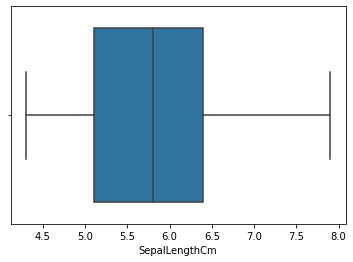

In [11]:
sns.boxplot(data["SepalLengthCm"])

This shows that there is no outliers in SepalLengthCm

<AxesSubplot:xlabel='SepalWidthCm'>

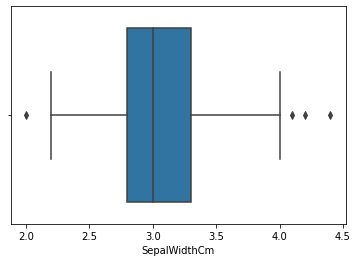

In [12]:
sns.boxplot(data["SepalWidthCm"])

This shows that outliers are present in SepalWidthCm

<AxesSubplot:xlabel='PetalLengthCm'>

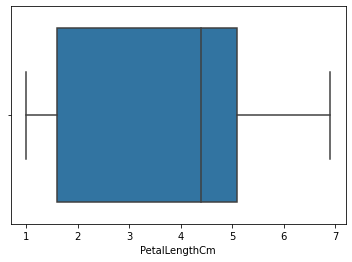

In [13]:
sns.boxplot(data["PetalLengthCm"])

This shows that there is no outliers in PetalLengthCm

<AxesSubplot:xlabel='PetalWidthCm'>

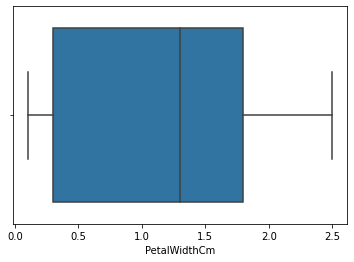

In [14]:
sns.boxplot(data["PetalWidthCm"])

This shows that there is no outliers in PetalWidthCm

## Treating outliers present in the SepalWidthCm column

<AxesSubplot:xlabel='SepalWidthCm'>

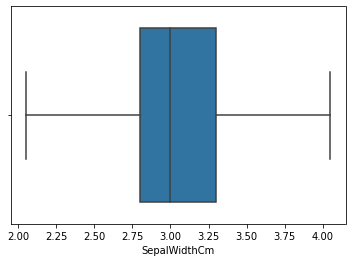

In [15]:
q1,q3=np.percentile(data['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
sns.boxplot(data['SepalWidthCm'])

## Understanding the data

## CHECKING THE COUNT FOR EACH SPECIES

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

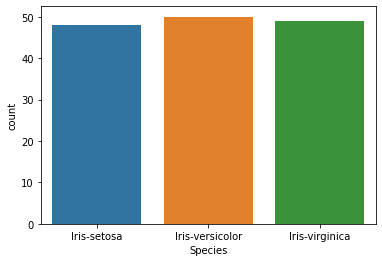

In [16]:
print(data.Species.value_counts())
sns.countplot(data.Species)

## Multi-variate Analysis

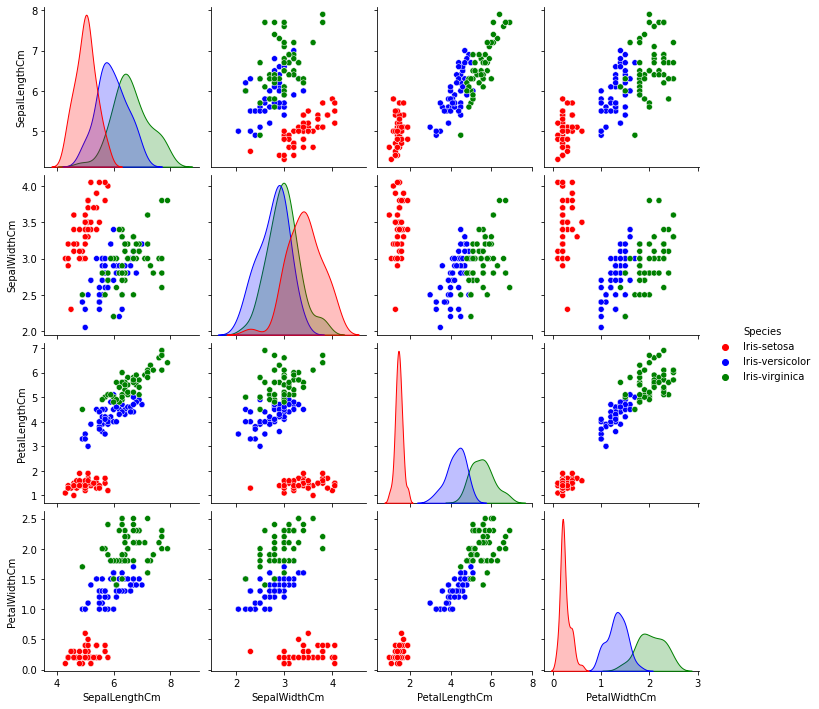

In [17]:
sns.pairplot(data=data, hue='Species', palette=['red','blue','green'])

From the above graphs, we can observe that :

a. Considering sepal length & sepal width, setosa is easily seperable but versicolor & virginica have some overlapping

b. Considering petal length & petal width, all 3 the species are quite seperable

## MODELLING AND APPLYING THE K-MEANS CLUSTERING TO FIND THE OPTIMUM NUMBER OF CLUSTERS

In [18]:
x = data.drop(['Species'],axis=1)
y = data.Species

In [19]:
from sklearn.cluster import KMeans
wcss = []

feature = data.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

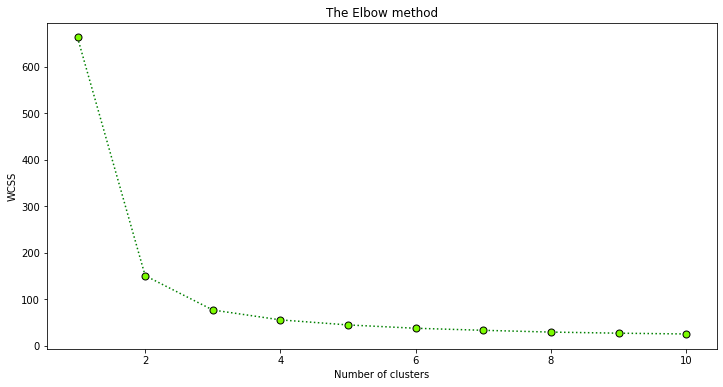

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss,'o:g', ms = 7, mec = 'black', mfc = 'lawngreen')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters are where the elbow curve happens. This is when the WCSS does not decrease significantly with each iteration.

Therefore, it is visible that "3" being the elbow point should be equal to the optimum number of clusters for this data.

## Applying kmeans to the dataset / Creating the kmeans classifier

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Plotting the centroids of the clusters

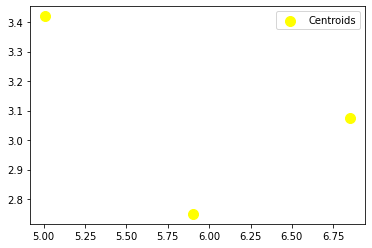

In [22]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

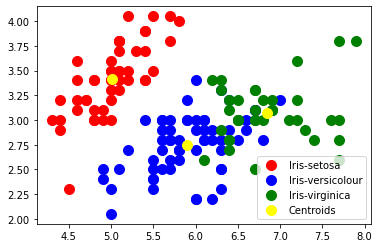

In [23]:
plt.scatter(feature[y_kmeans == 0, 0], feature[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(feature[y_kmeans == 1, 0], feature[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(feature[y_kmeans == 2, 0], feature[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [24]:
data['cluster'] = kmeans.labels_

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [25]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


## Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.24       147
   macro avg       0.32      0.24      0.28       147
weighted avg       0.32      0.24      0.28       147



## Confusion Matrix

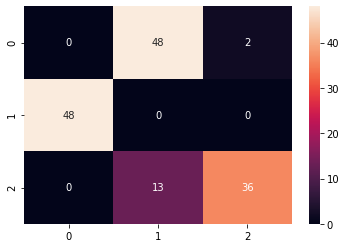

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);